In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
epoch_key = ("Jaq", 3, 2)

In [3]:
import numpy as np
import pandas as pd
from loren_frank_data_processing import (get_all_multiunit_indicators,
                                         get_all_spike_indicators,
                                         make_neuron_dataframe,
                                         make_tetrode_dataframe)
from loren_frank_data_processing.core import get_data_structure
from loren_frank_data_processing.position import (_calulcate_linear_position,
                                                  calculate_linear_velocity,
                                                  get_well_locations,
                                                  make_track_graph)
from loren_frank_data_processing.track_segment_classification import (
    calculate_linear_distance, classify_track_segments)
from loren_frank_data_processing.well_traversal_classification import (
    score_inbound_outbound, segment_path)
from ripple_detection import get_multiunit_population_firing_rate
from src.parameters import (ANIMALS, EDGE_ORDER, EDGE_SPACING,
                            SAMPLING_FREQUENCY)

animals = ANIMALS

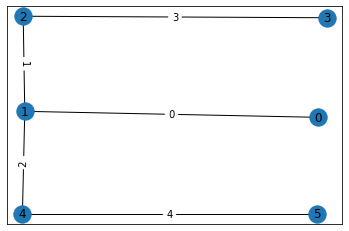

In [4]:
import networkx as nx
import matplotlib.pyplot as plt


def plot_track_graph(track_graph, ax=None, draw_edge_labels=False, **kwds):
    '''

    Parameters
    ----------
    track_graph : networkx.Graph
    ax : matplotlib axis, optional
    draw_edge_labels : bool, optional
        Plots the names of the edges
    kwds : additional plotting keyworks for `draw_networkx`

    '''
    if ax is None:
        ax = plt.gca()
    node_position = nx.get_node_attributes(track_graph, 'pos')
    nx.draw_networkx(track_graph, node_position, ax=ax, **kwds)

    if draw_edge_labels:
        edge_ids = {edge: ind for ind, edge in enumerate(track_graph.edges)}
        nx.draw_networkx_edge_labels(track_graph, node_position,
                                     edge_labels=edge_ids, ax=ax)

animal, day, epoch = epoch_key
track_graph, center_well_id = make_track_graph(epoch_key, animals)

plot_track_graph(track_graph, draw_edge_labels=True)

In [5]:
track_graph.edges()

EdgeView([(0, 1), (1, 2), (1, 4), (2, 3), (4, 5)])

In [6]:
track_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5))

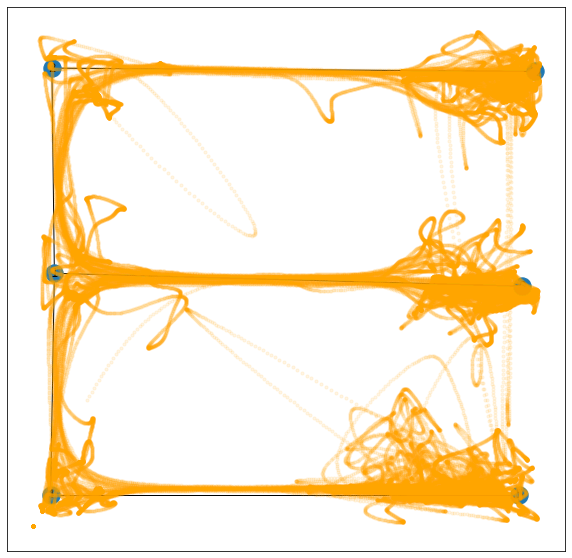

In [7]:
from src.load_data import _get_pos_dataframe

position_to_linearize=['nose_x', 'nose_y']

position_df = _get_pos_dataframe(epoch_key, ANIMALS)
position = position_df.loc[:, position_to_linearize].values

plt.figure(figsize=(10, 10))
plot_track_graph(track_graph)
plt.scatter(position[:, 0], position[:, 1], color="orange", zorder=100, alpha=0.1, s=10)

In [8]:
max_distance_from_well=30
route_euclidean_distance_scaling=1
min_distance_traveled=50
sensor_std_dev=5
diagonal_bias=0.5


track_segment_id = classify_track_segments(
    track_graph, position,
    route_euclidean_distance_scaling=route_euclidean_distance_scaling,
    sensor_std_dev=sensor_std_dev,
    diagonal_bias=diagonal_bias)

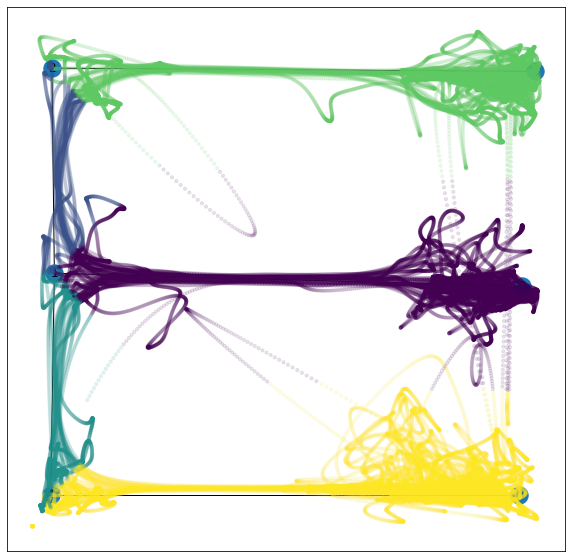

In [9]:
plt.figure(figsize=(10, 10))
plot_track_graph(track_graph)
plt.scatter(position[:, 0], position[:, 1], c=track_segment_id, zorder=100, alpha=0.1, s=10)

In [10]:
(position_df['linear_distance'],
 position_df['projected_x_position'],
 position_df['projected_y_position']) = calculate_linear_distance(
    track_graph, track_segment_id, center_well_id, position)

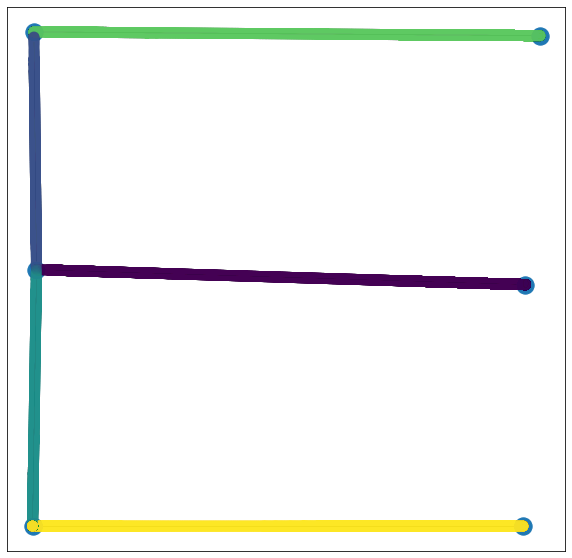

In [11]:
plt.figure(figsize=(10, 10))
plot_track_graph(track_graph)
plt.scatter(position_df.projected_x_position, position_df.projected_y_position, c=track_segment_id, zorder=100, alpha=0.1, s=100)

In [12]:
position_df['track_segment_id'] = track_segment_id

In [13]:
SEGMENT_ID_TO_ARM_NAME = {0.0: 'Center Arm',
                          1.0: 'Left Arm',
                          2.0: 'Right Arm',
                          3.0: 'Left Arm',
                          4.0: 'Right Arm'}
position_df = position_df.assign(
    arm_name=lambda df: df.track_segment_id.map(SEGMENT_ID_TO_ARM_NAME)
)

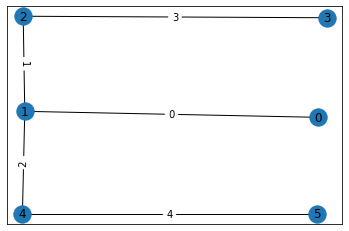

In [14]:
plot_track_graph(track_graph, draw_edge_labels=True)

In [15]:
EDGE_ORDER

[0, 1, 3, 2, 4]

In [16]:
EDGE_SPACING

[15, 0, 15, 0]

In [17]:
linear_position = _calulcate_linear_position(
            position_df.linear_distance.values,
            position_df.track_segment_id.values, track_graph, center_well_id,
            edge_order=EDGE_ORDER, edge_spacing=EDGE_SPACING)

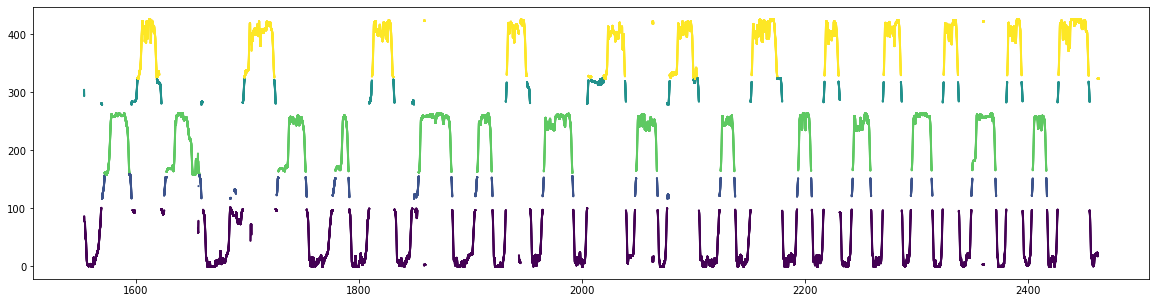

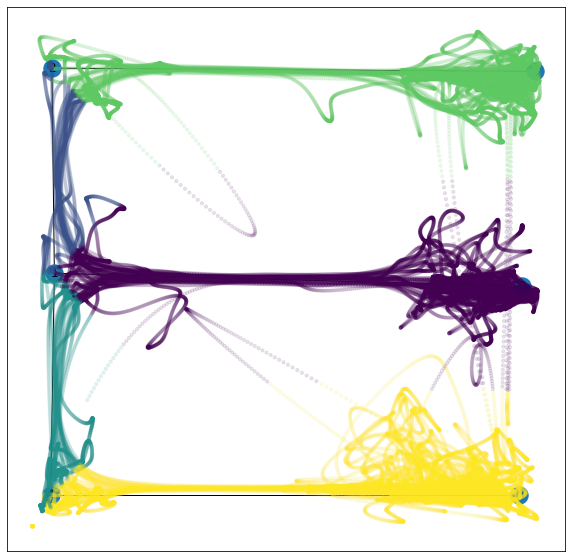

In [39]:
plt.figure(figsize=(20, 5))

plt.scatter(position_df.index / np.timedelta64(1, 's'), linear_position, s=1, c=track_segment_id)

plt.figure(figsize=(10, 10))
plot_track_graph(track_graph)
plt.scatter(position[:, 0], position[:, 1], c=track_segment_id, zorder=100, alpha=0.1, s=10)

(120.0, 200.0)

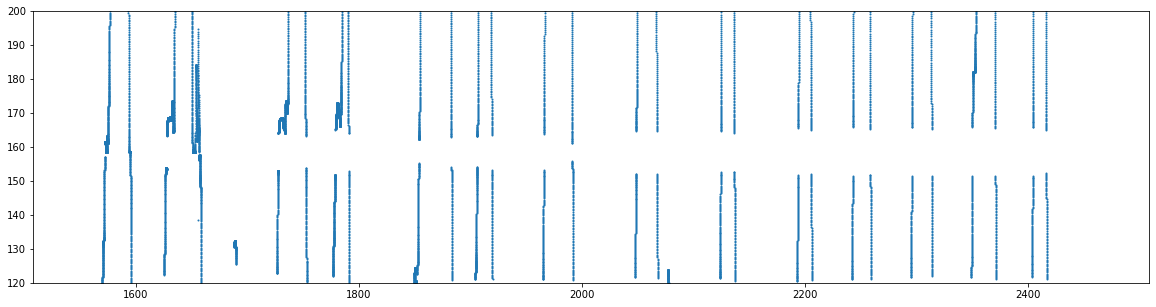

In [19]:
plt.figure(figsize=(20, 5))

plt.scatter(position_df.index / np.timedelta64(1, 's'), linear_position, s=1)
plt.ylim((120, 200))

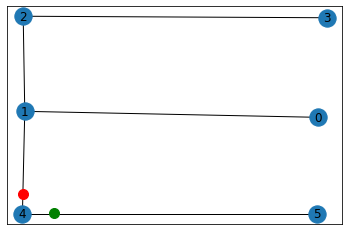

In [37]:
plot_track_graph(track_graph)
plt.scatter(15, 7, color="green", zorder=100, s=100)
plt.scatter(4, 15, color="red", zorder=100, s=100)

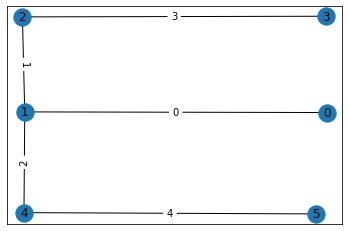

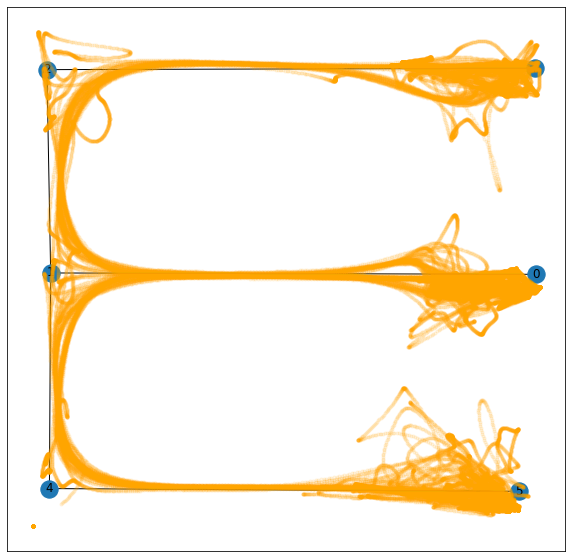

In [40]:
epoch_key = ("Jaq", 3, 16)

from src.load_data import _get_pos_dataframe
animal, day, epoch = epoch_key
track_graph, center_well_id = make_track_graph(epoch_key, animals)

plot_track_graph(track_graph, draw_edge_labels=True)

position_to_linearize=['nose_x', 'nose_y']

position_df = _get_pos_dataframe(epoch_key, ANIMALS)
position = position_df.loc[:, position_to_linearize].values

plt.figure(figsize=(10, 10))
plot_track_graph(track_graph)
plt.scatter(position[:, 0], position[:, 1], color="orange", zorder=100, alpha=0.1, s=10)